In [1]:
# Importing standard Data Analist libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
import matplotlib.ticker as ticker

# Some qualitative parameters here 
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [20]:
# Reading in our CSV File 
df = pd.read_csv(r'C:\Users\jerry\Documents\movies.csv')

In [3]:
# Initial check of the data 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [21]:
# Now we need to clean out empty data, fix strings, data types, etc
# Checking for Missing data first 

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    percent_missing = np.around(percent_missing, 2)
    print('{} -> \t{}%'.format(col,percent_missing))

name -> 	0.0%
rating -> 	0.01%
genre -> 	0.0%
year -> 	0.0%
released -> 	0.0%
score -> 	0.0%
votes -> 	0.0%
director -> 	0.0%
writer -> 	0.0%
star -> 	0.0%
country -> 	0.0%
budget -> 	0.28%
gross -> 	0.02%
company -> 	0.0%
runtime -> 	0.0%


In [22]:
# Checking out the missing percentages here only Budget stands out, with much less in other fields

# For these purposes we will be setting budget to the mean, and removing the rest 
df['budget'] = df['budget'].replace(np.NaN, df['budget'].mean())
df.dropna(inplace=True)

print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [23]:
# Looking into Data Types now 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [24]:
# Getting rid of .0's in all of our float64 values by changing them to int64

for column in df.columns:
    if df[column].dtype == 'float64' and column != 'score':
        df[column] = df[column].astype('int64')

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120


In [25]:
# Creating a year column off of released, there were some years that were off
# Using a regular expression to extract 4 numbers in a row as the year as type int

df['release_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [26]:
# dropping any duplicate rows

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120,2020


In [11]:
# Now after a rough data clean up we will start graphing correlations

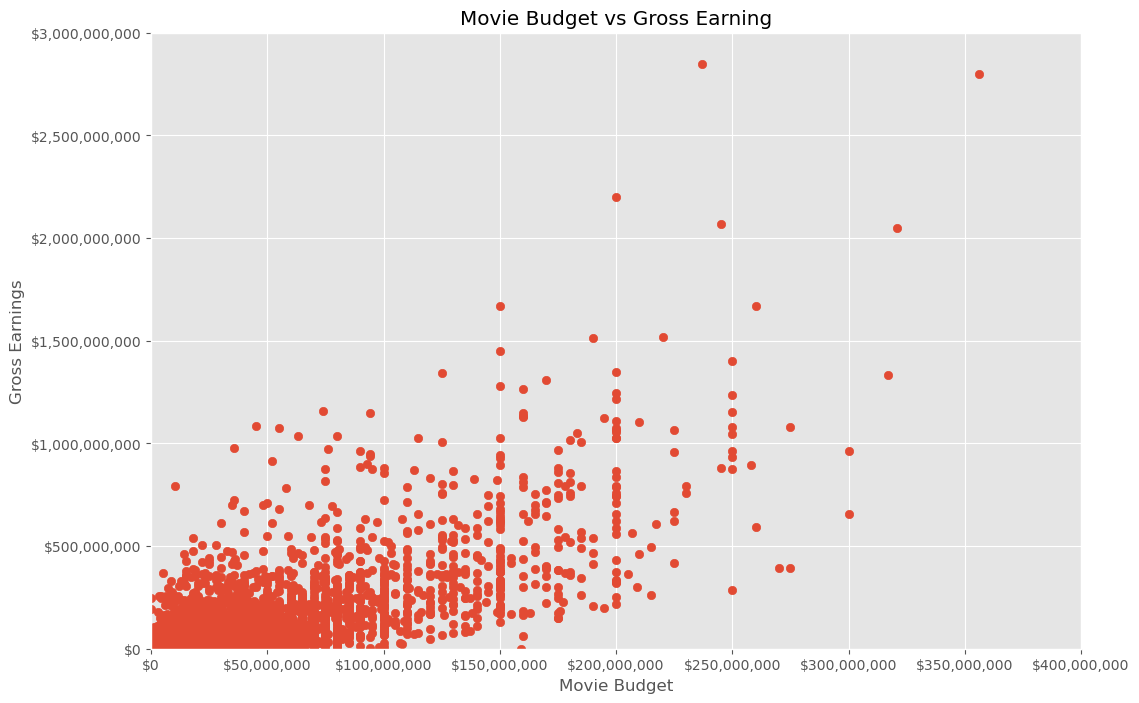

In [12]:
# Scatter plot of budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Movie Budget vs Gross Earning')
plt.ylabel('Gross Earnings')
plt.xlabel('Movie Budget')
plt.xlim(0,400000000)
plt.ylim(0,3000000000)
plt.ticklabel_format(style='plain', axis='both')

def format_with_commas(x,pos):
    return '${:,.0f}'.format(x)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))

plt.show()

In [13]:
# Now its kind of hard to tell if there is any correlation here, visually, so we will try something else 

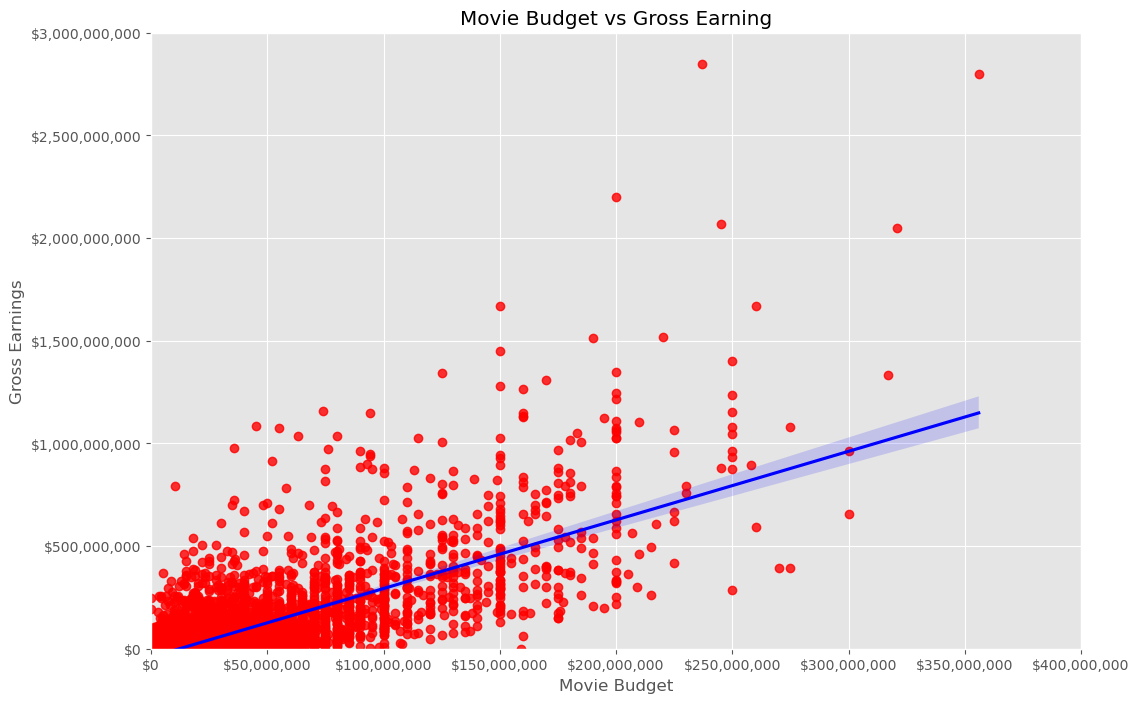

In [14]:
sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

plt.title('Movie Budget vs Gross Earning')
plt.ylabel('Gross Earnings')
plt.xlabel('Movie Budget')
plt.xlim(0,400000000)
plt.ylim(0,3000000000)
plt.ticklabel_format(style='plain', axis='both')

def format_with_commas(x,pos):
    return '${:,.0f}'.format(x)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_with_commas))


In [15]:
# Now for a quick correlation of all numeric values 

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime,release_year
year,1.000000,0.093951,0.218941,0.268662,0.258826,0.114237,0.997548
score,0.093951,1.000000,0.415190,0.061506,0.188071,0.397226,0.101308
votes,0.218941,0.415190,1.000000,0.420611,0.631110,0.309945,0.214533
budget,0.268662,0.061506,0.420611,1.000000,0.714607,0.266956,0.262293
gross,0.258826,0.188071,0.631110,0.714607,1.000000,0.245117,0.251873
runtime,0.114237,0.397226,0.309945,0.266956,0.245117,1.000000,0.113909
release_year,0.997548,0.101308,0.214533,0.262293,0.251873,0.113909,1.000000


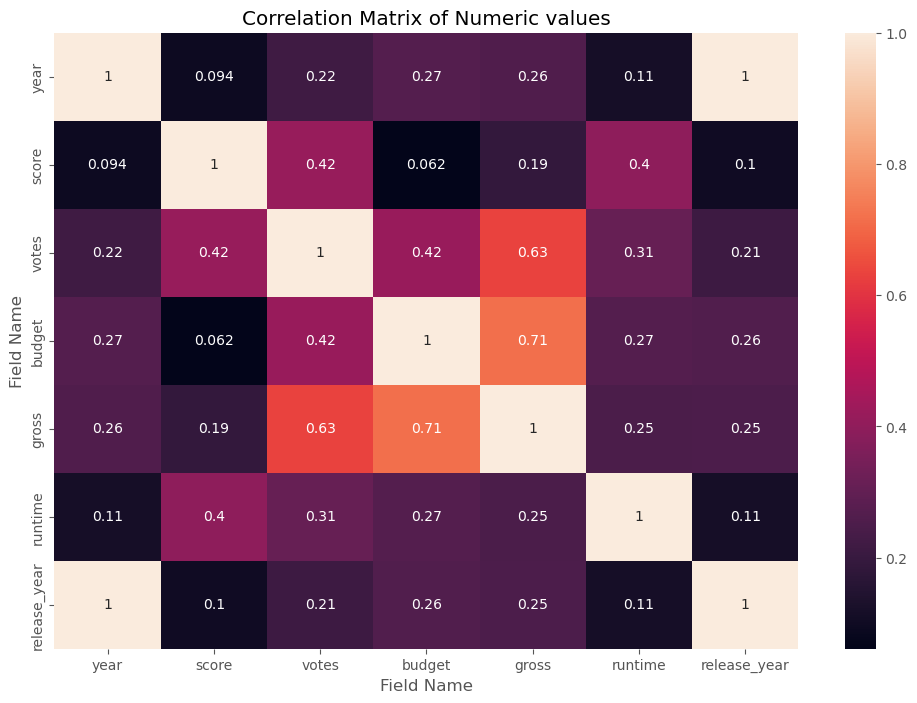

In [16]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix of Numeric values')
plt.xlabel('Field Name')
plt.ylabel('Field Name')
plt.show()


In [17]:
#Looking at Company Now for a Correlation Matrix 
# Need to Enumerate the String Column

In [29]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
            df_numerized[col_name] = df_numerized[col_name].astype('category')
            df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,6372,6,6,1980,1654,8.4,927000,2471,3851,979,52,19000000,46998772,2179,146,1980
1,5373,6,1,1980,1445,5.8,65000,2169,1564,306,53,4500000,58853106,686,104,1980
2,4956,4,0,1980,1718,8.7,1200000,1063,2464,1642,53,18000000,538375067,1446,124,1980
3,277,4,4,1980,1445,7.7,221000,1248,1920,2112,53,3500000,83453539,1697,88,1980
4,993,6,4,1980,1494,7.3,108000,1010,499,387,53,6000000,39846344,1665,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,5432,4,1,2020,978,6.8,42000,438,2838,895,6,135000000,111105497,17,100,2020
7652,5586,3,0,2020,482,6.8,3700,1048,1602,2645,8,80000000,461421559,350,149,2020
7653,6265,6,5,2020,89,5.4,2400,2404,3726,2300,53,35589876,3661,1786,98,2020
7656,6792,5,4,2020,1831,5.0,294,2399,3719,2241,53,35589876,413378,1788,120,2020


In [30]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149,2020
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,35589876,3661,Prowess Pictures,98,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120,2020


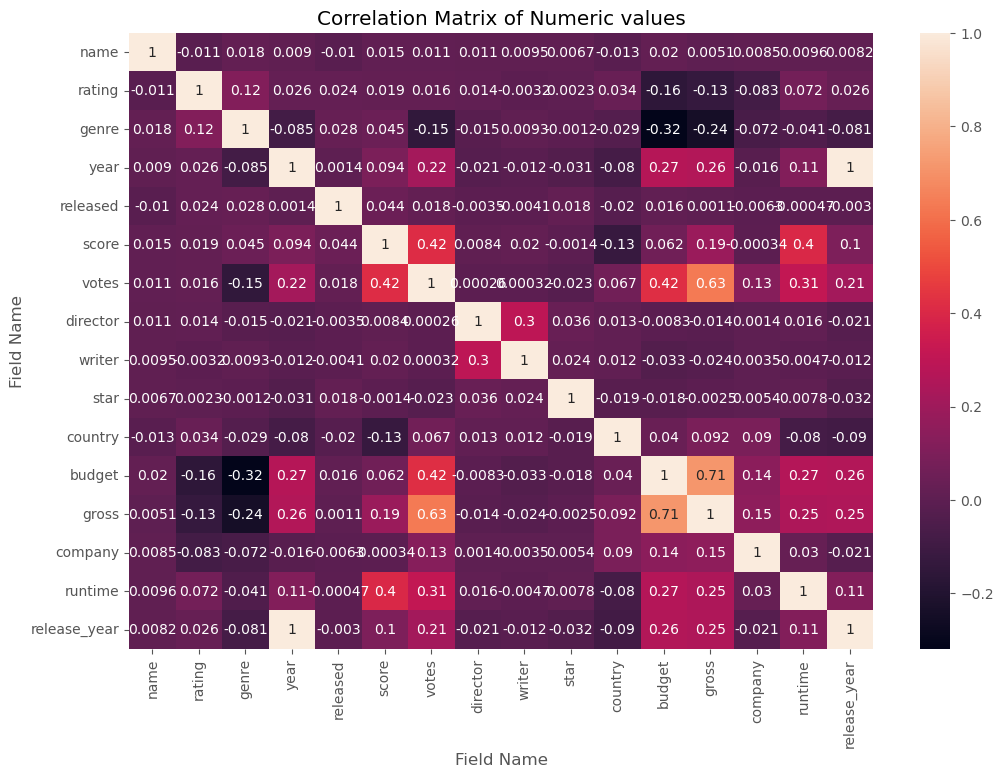

In [28]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix of Numeric values')
plt.xlabel('Field Name')
plt.ylabel('Field Name')
plt.show()


In [35]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
name,1.000000,-0.010815,0.018363,0.008987,-0.010012,0.014970,0.011462,0.010575,0.009451,0.006731,-0.012544,0.020022,0.005135,0.008529,0.009563,0.008209
rating,-0.010815,1.000000,0.118600,0.025950,0.024188,0.018596,0.016485,0.013653,-0.003234,0.002255,0.033607,-0.158226,-0.131786,-0.083083,0.072340,0.026467
genre,0.018363,0.118600,1.000000,-0.084892,0.027639,0.045478,-0.148120,-0.015227,0.009340,-0.001158,-0.029208,-0.319104,-0.242597,-0.071590,-0.040939,-0.080618
year,0.008987,0.025950,-0.084892,1.000000,0.001440,0.093951,0.218941,-0.021394,-0.011853,-0.031476,-0.080122,0.268662,0.258826,-0.015880,0.114237,0.997548
released,-0.010012,0.024188,0.027639,0.001440,1.000000,0.044469,0.018211,-0.003460,-0.004121,0.017597,-0.020491,0.015625,0.001084,-0.006299,-0.000472,-0.003021
score,0.014970,0.018596,0.045478,0.093951,0.044469,1.000000,0.415190,0.008358,0.019710,-0.001386,-0.126497,0.061506,0.188071,-0.000342,0.397226,0.101308
votes,0.011462,0.016485,-0.148120,0.218941,0.018211,0.415190,1.000000,0.000260,0.000323,-0.022542,0.066907,0.420611,0.631110,0.128127,0.309945,0.214533
director,0.010575,0.013653,-0.015227,-0.021394,-0.003460,0.008358,0.000260,1.000000,0.297126,0.036188,0.012726,-0.008284,-0.014296,0.001379,0.015713,-0.020944
writer,0.009451,-0.003234,0.009340,-0.011853,-0.004121,0.019710,0.000323,0.297126,1.000000,0.024161,0.012415,-0.033373,-0.024021,0.003462,-0.004668,-0.011842
star,0.006731,0.002255,-0.001158,-0.031476,0.017597,-0.001386,-0.022542,0.036188,0.024161,1.000000,-0.018838,-0.017772,-0.002451,0.005417,0.007827,-0.032413


In [36]:
# Going to quickly sort by highest correlation

In [37]:
corr_matrix = df_numerized.corr()

corr_pair = corr_matrix.unstack()

name          name            1.000000
              rating         -0.010815
              genre           0.018363
              year            0.008987
              released       -0.010012
                                ...   
release_year  budget          0.262293
              gross           0.251873
              company        -0.020509
              runtime         0.113909
              release_year    1.000000
Length: 256, dtype: float64

In [38]:
sorted_corr = corr_pair.sort_values()

sorted_corr

genre         budget         -0.319104
budget        genre          -0.319104
genre         gross          -0.242597
gross         genre          -0.242597
budget        rating         -0.158226
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
release_year  release_year    1.000000
Length: 256, dtype: float64

In [40]:
sorted_corr[(sorted_corr > 0.5) & (sorted_corr < 1)]

votes         gross           0.631110
gross         votes           0.631110
              budget          0.714607
budget        gross           0.714607
release_year  year            0.997548
year          release_year    0.997548
dtype: float64

In [ ]:
# So Votes correlate greatly with Gross Earnings as well as Budget with Gross Profit